In [1]:
##Importing Necessary Libraries
import pandas as pd
import numpy as np

In [110]:
##Importing training dataset
df = pd.read_csv("D:\\Data science Project\\Omar-dataset\\dataset\\train.csv")

In [111]:
df.head()

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,6.341969
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,6.590176
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,6.144782


In [112]:
#Checking for null values
df.isnull().sum()

patient_id                    0
name_of_drug                  0
use_case_for_drug             0
review_by_patient             0
effectiveness_rating          0
drug_approved_by_UIC          0
number_of_times_prescribed    0
base_score                    0
dtype: int64

In [114]:
#Checking for duplicate values
df.duplicated().sum()

0

In [115]:
##Your task is to make a sophisticated NLP-based Machine Learning model that takes the name of drug,
##use case, review, drug approval by UIC, number of times prescribed, effectiveness as Inputs and gives the base 
##score as output. 

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32165 entries, 0 to 32164
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   patient_id                  32165 non-null  int64  
 1   name_of_drug                32165 non-null  object 
 2   use_case_for_drug           32165 non-null  object 
 3   review_by_patient           32165 non-null  object 
 4   effectiveness_rating        32165 non-null  int64  
 5   drug_approved_by_UIC        32165 non-null  object 
 6   number_of_times_prescribed  32165 non-null  int64  
 7   base_score                  32165 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 2.0+ MB


In [117]:
#dropping unnecesary coloumns
df1 = df.drop(['patient_id','review_by_patient'], axis=1)

In [118]:
df1.head()

,name_of_drug,use_case_for_drug,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
0,Valsartan,Left Ventricular Dysfunction,9,20-May-12,27,8.022969
1,Guanfacine,ADHD,8,27-Apr-10,192,7.858458
2,Lybrel,Birth Control,5,14-Dec-09,17,6.341969
3,Buprenorphine / naloxone,Opiate Dependence,9,27-Nov-16,37,6.590176
4,Cialis,Benign Prostatic Hyperplasia,2,28-Nov-15,43,6.144782


In [119]:
df1.shape

(32165, 6)

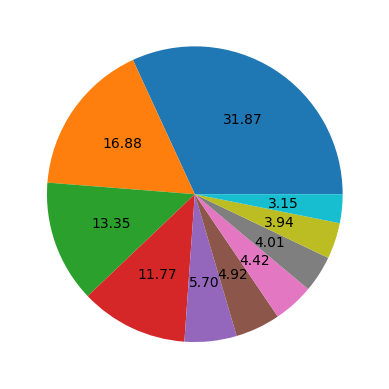

In [120]:
#little Bit of EDA
import matplotlib.pyplot as plt
plt.pie(df1['effectiveness_rating'].value_counts(),autopct="%0.2f")
plt.show()

In [121]:
import seaborn as sns

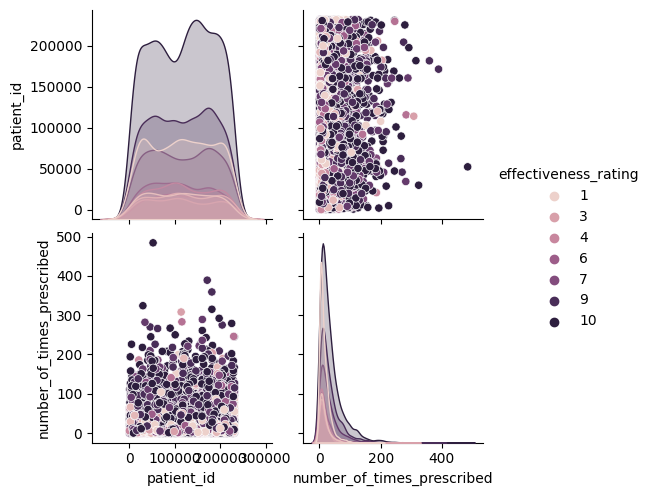

In [13]:
sns.pairplot(df,hue='effectiveness_rating')

In [122]:
df1['name_of_drug'].unique().sum()

"ValsartanGuanfacineLybrelBuprenorphine / naloxoneCialisEthinyl estradiol / levonorgestrelL-methylfolateAmitriptylineLamotrigineAtriplaEtanerceptSertralineTrilafonFluconazoleClonazepamMetaxaloneVenlafaxineLedipasvir / sofosbuvirSymbyaxBuprenorphineNuvaRingPrepopikEffexor XRClomipheneAmitizaLithiumAugmentin XRMonistat 7-Day Combination PackSpironolactoneAdapalene / benzoyl peroxideAmlodipine / olmesartanLamictalPropranololPhentermine / topiramateMedroxyprogesteroneAczoneRestasisEpiduoDulaglutideMorphineEthinyl estradiol / norgestimateNexplanonEtonogestrelCamphor / mentholLupron DepotLurasidoneDiflucanLisinoprilAlprazolamLeuprolideProveraEletriptanFluoxetineEthinyl estradiol / norethindroneLiraglutideEscitalopramQsymiaZoloftLilettaExenatideParoxetineContraveAcetaminophen / oxycodonePramipexoleCelecoxibLansoprazoleAzithromycinLevoraParaGardCiprofloxacinAveloxLevonorgestrelTamifluBupropion / naltrexoneTamsulosinTestimOrthoviscNaltrexoneMirtazapineAripiprazoleVareniclineClindamycinInflixima

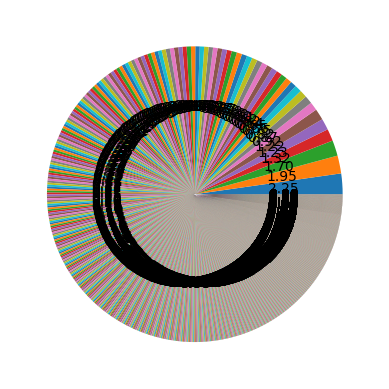

In [123]:
plt.pie(df1['name_of_drug'].value_counts(),autopct="%0.2f")
plt.show()

In [124]:
df1['use_case_for_drug'].unique()

array(['Left Ventricular Dysfunction', 'ADHD', 'Birth Control',
       'Opiate Dependence', 'Benign Prostatic Hyperplasia', 'Depression',
       'ibromyalgia', 'Bipolar Disorde', 'HIV Infection',
       'Rheumatoid Arthritis', 'Psychosis', 'Vaginal Yeast Infection',
       'Panic Disorde', 'Muscle Spasm', 'Hepatitis C', 'Pain',
       'Bowel Preparation', 'emale Infertility',
       'Constipation, Drug Induced', 'Skin and Structure Infection',
       'Acne', 'High Blood Pressure', 'Anxiety', 'Obesity',
       'Endometriosis', 'Keratoconjunctivitis Sicca', 'Diabetes, Type 2',
       'Chronic Pain', 'Uterine Fibroids',
       '4</span> users found this comment helpful.', 'Migraine',
       'Weight Loss', 'Trichotillomania', 'Restless Legs Syndrome',
       "Barrett's Esophagus", 'Bronchitis', 'Diverticulitis', 'Sinusitis',
       'Influenza', 'Anxiety and Stress', 'Abnormal Uterine Bleeding',
       'Hypogonadism, Male', 'Osteoarthritis', 'Insomnia', 'Autism',
       'Smoking Cessation',

In [129]:
#Label encoding catogorical values
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [130]:
df1['name_of_drug']=encoder.fit_transform(df1['name_of_drug'])
df1['use_case_for_drug']=encoder.fit_transform(df1['use_case_for_drug'])


In [131]:
df1.head()

,name_of_drug,use_case_for_drug,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
0,2072,335,9,20-May-12,27,8.022969
1,923,39,8,27-Apr-10,192,7.858458
2,1212,110,5,14-Dec-09,17,6.341969
3,332,412,9,27-Nov-16,37,6.590176
4,436,105,2,28-Nov-15,43,6.144782


In [132]:
df1.shape

(32165, 6)

In [133]:
import pandas as pd
import datetime

df1['drug_approved_by_UIC'] = df1['drug_approved_by_UIC'].apply(lambda x: pd.to_datetime(x, format='%d-%b-%y').timestamp())









In [134]:
df1.head()

,name_of_drug,use_case_for_drug,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
0,2072,335,9,1.337472e+09,27,8.022969
1,923,39,8,1.272326e+09,192,7.858458
2,1212,110,5,1.260749e+09,17,6.341969
3,332,412,9,1.480205e+09,37,6.590176
4,436,105,2,1.448669e+09,43,6.144782


In [135]:
#Standardizing the values
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
scaler = MinMaxScaler()

df1['drug_approved_by_UIC'] = scaler.fit_transform(df1[['drug_approved_by_UIC']])




In [136]:
df1.head()

,name_of_drug,use_case_for_drug,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
0,2072,335,9,0.432244,27,8.022969
1,923,39,8,0.221570,192,7.858458
2,1212,110,5,0.184130,17,6.341969
3,332,412,9,0.893825,37,6.590176
4,436,105,2,0.791841,43,6.144782


In [139]:
#Loading test data
test = pd.read_csv('D:\\Data science Project\\Omar-dataset\\dataset\\test.csv')

In [140]:
test.head()

,patient_id,name_of_drug,review_by_patient,drug_approved_by_UIC,number_of_times_prescribed,use_case_for_drug,effectiveness_rating
0,163740,Mirtazapine,"""I&#039;ve tried a few antidepressants over th...",28-Feb-12,22,Depression,10
1,39293,Contrave,"""Contrave combines drugs that were used for al...",5-Mar-17,35,Weight Loss,9
2,208087,Zyclara,"""4 days in on first 2 weeks. Using on arms an...",3-Jul-14,13,Keratosis,4
3,23295,Methadone,"""Ive been on Methadone for over ten years and ...",18-Oct-16,21,Opiate Withdrawal,7
4,97013,Ambien,"""Ditto on rebound sleepless when discontinued....",13-Jan-15,44,Insomnia,2


In [141]:
#dropping unecessary coloumns
df2 = test.drop(['patient_id','review_by_patient'], axis=1)

In [142]:
df2.head()

,name_of_drug,drug_approved_by_UIC,number_of_times_prescribed,use_case_for_drug,effectiveness_rating
0,Mirtazapine,28-Feb-12,22,Depression,10
1,Contrave,5-Mar-17,35,Weight Loss,9
2,Zyclara,3-Jul-14,13,Keratosis,4
3,Methadone,18-Oct-16,21,Opiate Withdrawal,7
4,Ambien,13-Jan-15,44,Insomnia,2


In [143]:
#transforming catogorical values
df2['name_of_drug']=encoder.fit_transform(df2['name_of_drug'])
df2['use_case_for_drug']=encoder.fit_transform(df2['use_case_for_drug'])

In [144]:
df2.head()

,name_of_drug,drug_approved_by_UIC,number_of_times_prescribed,use_case_for_drug,effectiveness_rating
0,854,28-Feb-12,22,130,10
1,311,5-Mar-17,35,441,9
2,1471,3-Jul-14,13,241,4
3,821,18-Oct-16,21,299,7
4,66,13-Jan-15,44,231,2


In [145]:
df2['drug_approved_by_UIC'] = df2['drug_approved_by_UIC'].apply(lambda x: pd.to_datetime(x, format='%d-%b-%y').timestamp())

In [146]:
df2['drug_approved_by_UIC'] = scaler.fit_transform(df2[['drug_approved_by_UIC']])

In [147]:
df2.head()

,name_of_drug,drug_approved_by_UIC,number_of_times_prescribed,use_case_for_drug,effectiveness_rating
0,854,0.409167,22,130,10
1,311,0.921185,35,441,9
2,1471,0.648407,13,241,4
3,821,0.882616,21,299,7
4,66,0.702627,44,231,2


In [176]:
df2.shape

(10760, 5)

In [148]:
df1.head()

,name_of_drug,use_case_for_drug,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
0,2072,335,9,0.432244,27,8.022969
1,923,39,8,0.221570,192,7.858458
2,1212,110,5,0.184130,17,6.341969
3,332,412,9,0.893825,37,6.590176
4,436,105,2,0.791841,43,6.144782


In [149]:

X = df1.drop('base_score',axis=1)

In [150]:
y = df1["base_score"]

In [167]:
#spliting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [168]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error


enet = ElasticNet(alpha=0.1, l1_ratio=0.5)


enet.fit(X_train, y_train)


y_pred = enet.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


print("Mean squared error: {:.2f}".format(mse))
print("Mean absolute error: {:.2f}".format(mae))


Mean squared error: 2.05
Mean absolute error: 1.14


In [169]:
from sklearn.linear_model import Ridge



ridge_reg = Ridge(alpha=1.0)

ridge_reg.fit(X_train, y_train)


y_pred = ridge_reg.predict(X_test)


print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))


Mean Squared Error: 2.0492068009816196
Mean Absolute Error: 1.1386342559814917


In [170]:
y_pred = ridge_reg.predict(X_test)
score = ridge_reg.score(X_test, y_test)


In [177]:
y_pred = enet.predict(df2)
print(y_pred)



[ 9.50430641 11.96765804  7.78807585 ... 13.48967334  6.65461082
 14.05425368]


C:\Users\Danish private\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [211]:
#Combing the test dataset with predicted values
output1 = df2.join(ot,
               lsuffix = '_df2',
               rsuffix = '_ot')

In [212]:
output1.head()

,name_of_drug,drug_approved_by_UIC,number_of_times_prescribed,use_case_for_drug,effectiveness_rating,predicted_values
0,854,0.409167,22,130,10,9.504306
1,311,0.921185,35,441,9,11.967658
2,1471,0.648407,13,241,4,7.788076
3,821,0.882616,21,299,7,9.309334
4,66,0.702627,44,231,2,13.662708


In [213]:
#Saving the final csv
output1.to_csv('D:\Omar assigment\submission.csv', index=False)